In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


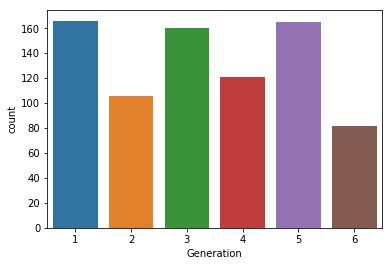

In [4]:
sb.countplot(data=pokemon, x = 'Generation')

In [7]:
base_color = sb.color_palette()[0]

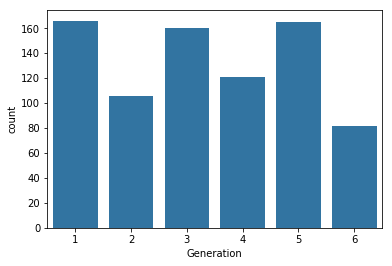

In [8]:
sb.countplot(data=pokemon, x = 'Generation', color = base_color)

In [13]:
pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [11]:
gen_order = pokemon['Generation'].value_counts().index

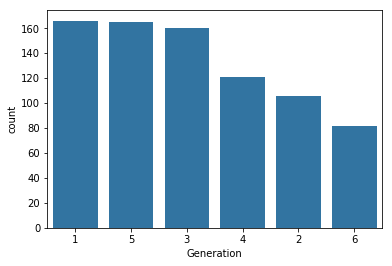

In [14]:
sb.countplot(data=pokemon, x = 'Generation', color = base_color, order = gen_order)

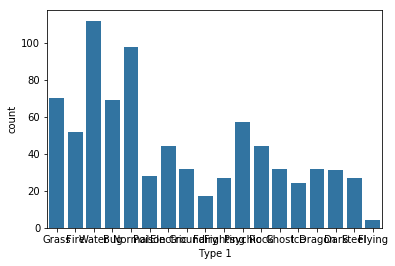

In [15]:
sb.countplot(data = pokemon, x = 'Type 1', color = base_color)

In [17]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [18]:
type_order = pokemon['Type 1'].value_counts().index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

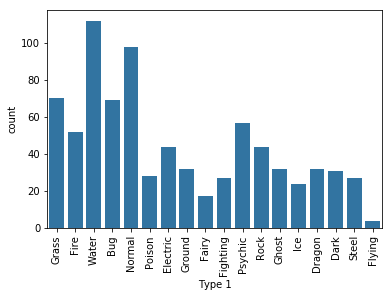

In [19]:
sb.countplot(data = pokemon, x = 'Type 1', color = base_color)
plt.xticks(rotation = 90)

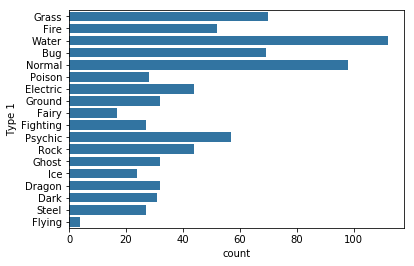

In [20]:
sb.countplot(data = pokemon, y = 'Type 1', color = base_color)

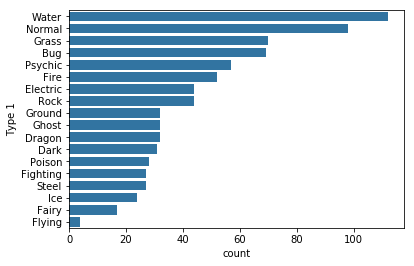

In [21]:
sb.countplot(data = pokemon, y = 'Type 1', color = base_color, order = type_order)

In [22]:
pkmn_types = pokemon.melt(id_vars = ['#', 'Name'], value_vars = ['Type 1', 'Type 2'], var_name = 'type_level', value_name='type').dropna()

In [23]:
pkmn_types[802:812]

,#,Name,type_level,type
802,3,Venusaur,Type 2,Poison
803,3,VenusaurMega Venusaur,Type 2,Poison
806,6,Charizard,Type 2,Flying
807,6,CharizardMega Charizard X,Type 2,Dragon
808,6,CharizardMega Charizard Y,Type 2,Flying
815,12,Butterfree,Type 2,Flying
816,13,Weedle,Type 2,Poison
817,14,Kakuna,Type 2,Poison
818,15,Beedrill,Type 2,Poison
819,15,BeedrillMega Beedrill,Type 2,Poison


In [27]:
pkmn_types['type'].value_counts()

Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
Name: type, dtype: int64

In [29]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

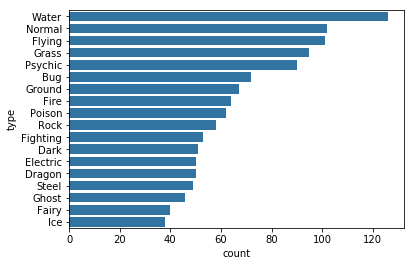

In [30]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

In [31]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1575


In [33]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14])

In [35]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

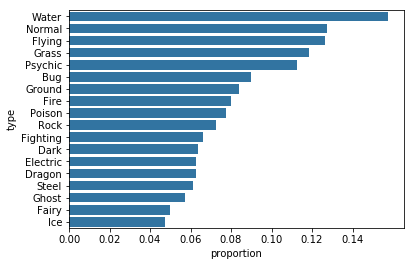

In [36]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

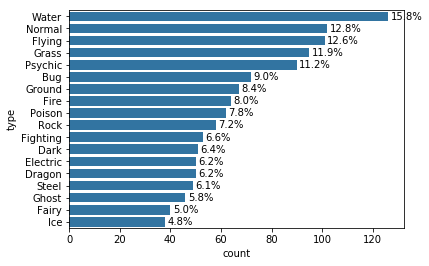

In [40]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_string, va = 'center')